In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

auto = pd.read_csv('Auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## (a) Which of the predictors are quantitative, and which are qualitative?
Imediatamente, pode-se pensar que apenas "name" seja qualitativa, no entanto algumas variáveis como "cylinders" e "year", apesar de representadas por números, podem ser categorizadas de maneira discreta em poucas categorias, de maneira que também podem ser consideradas qualitativas caso seja necessário. As demais variáveis são quantitativas. "Origins" no entanto é uma variável que não imediatemente faz algum sentido...

## b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

In [5]:
auto.describe().round(2)

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.00,397.00,397.00,397.00,397.00,397.00,397.00
mean,23.52,5.46,193.53,2970.26,15.56,75.99,1.57
std,7.83,1.70,104.38,847.90,2.75,3.69,0.80
min,9.00,3.00,68.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.00,2223.00,13.80,73.00,1.00
50%,23.00,4.00,146.00,2800.00,15.50,76.00,1.00
75%,29.00,8.00,262.00,3609.00,17.10,79.00,2.00
max,46.60,8.00,455.00,5140.00,24.80,82.00,3.00


## (c) What is the mean and standard deviation of each quantitative predictor?

In [19]:
min_values = auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].min()
max_values = auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].max()
mean_values = auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].mean()
std_values = auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].std()
range_values = max_values - min_values
summary_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Range': range_values,
    'Mean': mean_values,
    'Std': std_values
})

summary_df

,Min,Max,Range,Mean,Std
mpg,9.0,46.6,37.6,23.515869,7.825804
cylinders,3.0,8.0,5.0,5.458438,1.701577
displacement,68.0,455.0,387.0,193.532746,104.379583
weight,1613.0,5140.0,3527.0,2970.261965,847.904119
acceleration,8.0,24.8,16.8,15.555668,2.749995
year,70.0,82.0,12.0,75.994962,3.690005
origin,1.0,3.0,2.0,1.574307,0.802549


## d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [23]:
subset_auto = auto.drop(index=range(9, 84))
min_values = subset_auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].min()
max_values = subset_auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].max()
mean_values = subset_auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].mean()
std_values = subset_auto[['mpg','cylinders','displacement','weight','acceleration','year','origin']].std()
range_values_subset = max_values - min_values
summary_subset_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Range': range_values,
    'Mean': mean_values,
    'Std': std_values
})

summary_subset_df

,Min,Max,Range,Mean,Std
mpg,11.0,46.6,37.6,24.446584,7.897147
cylinders,3.0,8.0,5.0,5.366460,1.652674
displacement,68.0,455.0,387.0,186.770186,99.606562
weight,1649.0,4997.0,3527.0,2931.372671,810.712477
acceleration,8.5,24.8,16.8,15.725466,2.676686
year,70.0,82.0,12.0,77.136646,3.119623
origin,1.0,3.0,2.0,1.602484,0.818627


## (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

/home/pedrohdemedeiros/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


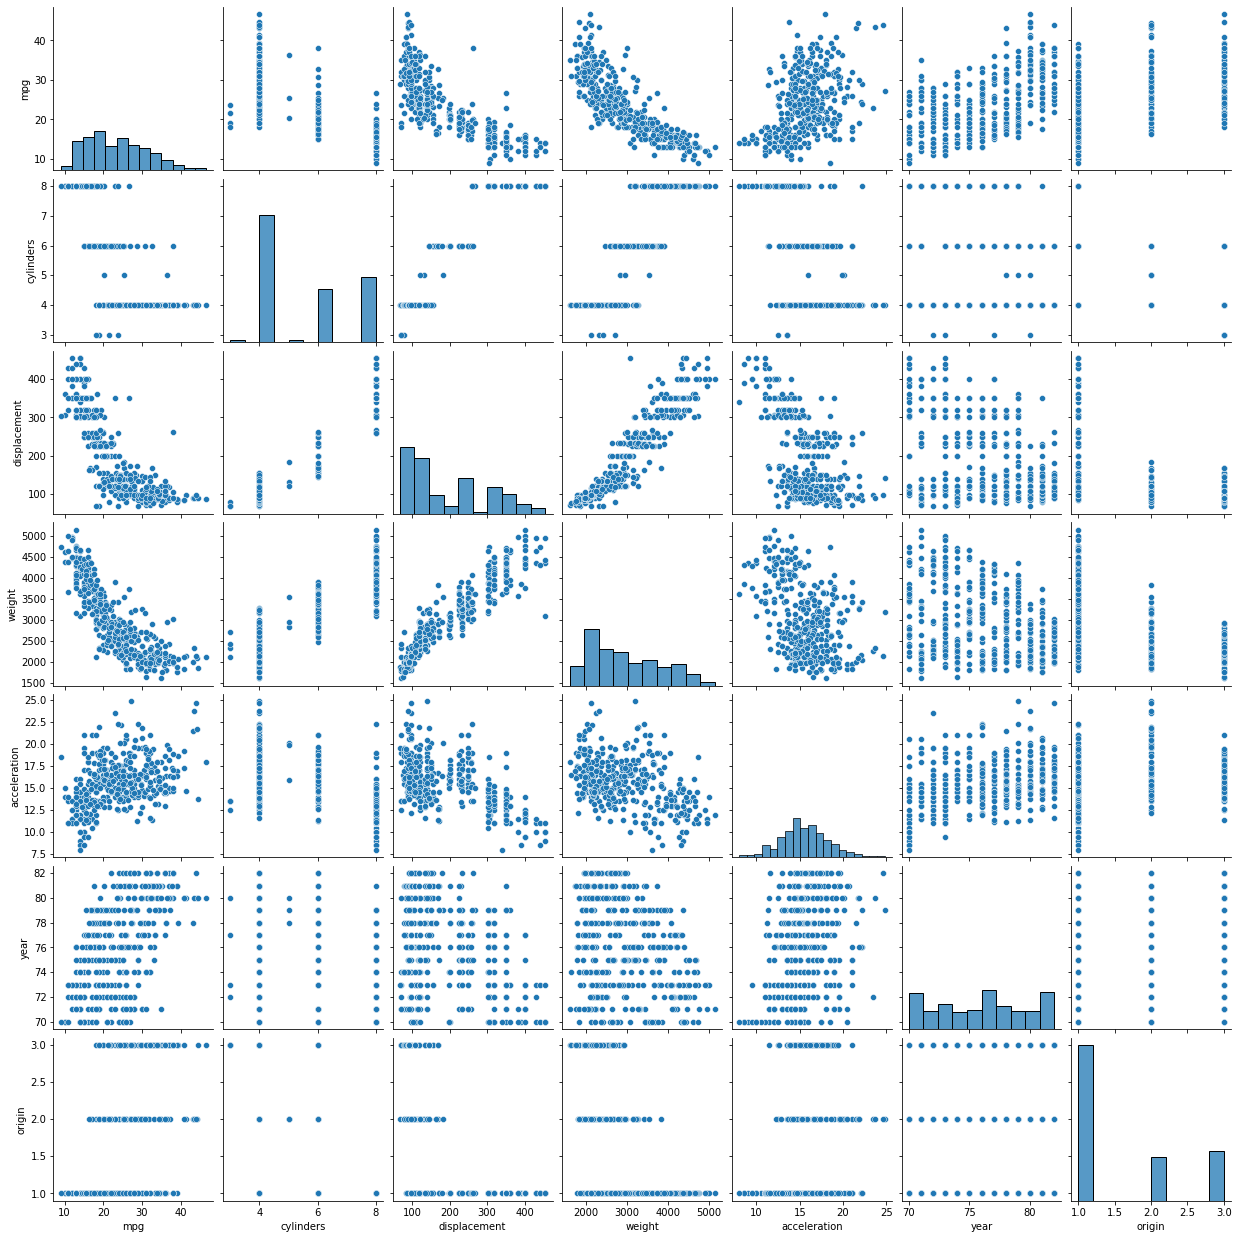

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Removendo a coluna 'name' do DataFrame
auto_without_name = auto.drop(columns='name')

# Criando scatterplots entre todas as variáveis
sns.pairplot(auto_without_name)

# Mostrando os plots
plt.show()

## (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

Algumas variáveis apresnetam alguma relação linear com mpg, tanto direta quanto inversamente proporcionais. Em uma análise visual dos gráficos gerados, pode-se dizer que as variáveis "displacement", "horsepower", "weight" e "acceleration" apresentam alguma relação com mpg, no entanto, "displacement" e "weight" parecem ser as que apresentam maior relação com mpg.